# Computing Allan variance and noise parameters from it

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from allan_variance import allan_variance, params_from_avar

First generate a model signal containing additive white noise, random walk and deterministic ramp:

In [5]:
def generate_signal(n, dt, q_white, q_walk, q_ramp, random_state=0):
    rng = np.random.RandomState(random_state)
    white = q_white * rng.randn(n) * dt ** 0.5
    walk = q_walk * dt ** 0.5 * np.cumsum(rng.randn(n))    
    ramp = q_ramp * dt * np.arange(n)
    return white + walk * dt + ramp * dt

In [6]:
dt = 1e-2

In [7]:
x = generate_signal(1000000, dt, 0.1, 0.05, 0.002)

Now compute AV curve using `allan_variance` function:

In [8]:
tau, av = allan_variance(x, dt)

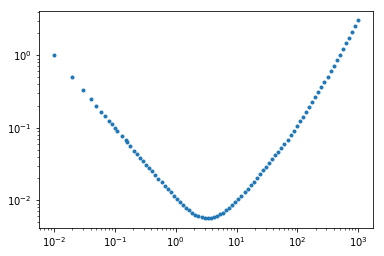

In [9]:
plt.loglog(tau, av, '.')

We clearly see a part with a slope of -1 corresponding to the white noise. At large averaging times AV is dominated by the linear ramp (slope is +2). The random walk part is located between them.

We can automatically estimate the noise magnitudes using `params_from_avar` function:

In [11]:
params, av_pred = params_from_avar(tau, av, effects=['quantization', 'white', 'flicker', 'walk', 'ramp'])

In [12]:
params

quantization    0.000656
white           0.099755
flicker         0.000000
walk            0.050591
ramp            0.002167
Name: 0, dtype: float64

We see that the estimated parameters are close to the model values. And the parameters of the effects which weren't included in the model (quantization and flicker noise) are zero or very close to it.

Finally we display the estimated AV curve along with computed actual values:

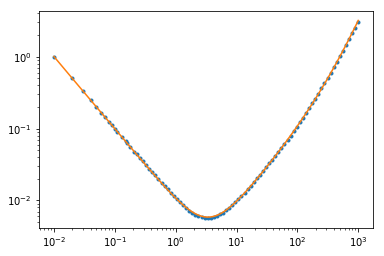

In [13]:
plt.loglog(tau, av, '.')
plt.loglog(tau, av_pred)